In [1]:
%matplotlib inline

In [2]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
names = ["Word", "POS", "Lemma"]
nachsommer = pd.read_table("res/de/DerNachsommerTaggedClean.txt", header=None, names=names)

In [4]:
nachsommer.head()

,Word,POS,Lemma
0,Der,ART,die
1,Nachsommer,NN,Nachsommer
2,Eine,ART,eine
3,Erzählung,NN,Erzählung
4,von,APPR,von


In [5]:
nachsommer["POS"].describe()

count     248158
unique        47
top           NN
freq       45406
Name: POS, dtype: object

In [16]:
nachsommer[nachsommer["POS"]!="NN"]

,Word,POS,Lemma
0,Der,ART,die
2,Eine,ART,eine
4,von,APPR,von
5,Adalbert,NE,Adalbert
8,Die,ART,die
10,Der,ART,die
12,Die,ART,die
14,Die,ART,die
16,Der,ART,die
18,Der,ART,die


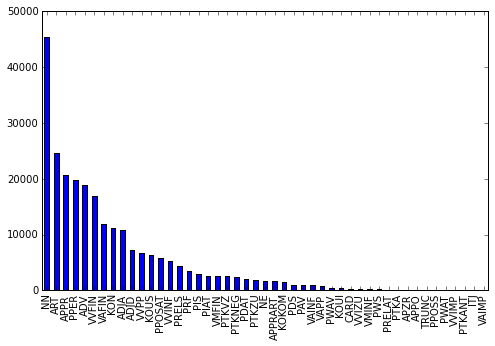

In [34]:
nachsommer.POS.value_counts().plot(kind="bar", figsize=(16,8))

In [17]:
troismousquetaires = pd.read_table("res/fr/LesTroisMousquetairesTaggedClean.txt", names=names, header=None)

In [18]:
troismousquetaires.head()

,Word,POS,Lemma
0,LES,DET:ART,le
1,TROIS,NOM,trois
2,MOUSQUETAIRES,ADJ,<unknown>
3,Table,ADJ,<unknown>
4,des,PRP:det,du


In [19]:
troismousquetaires.POS.describe()

count     235649
unique        28
top          NOM
freq       42253
Name: POS, dtype: object

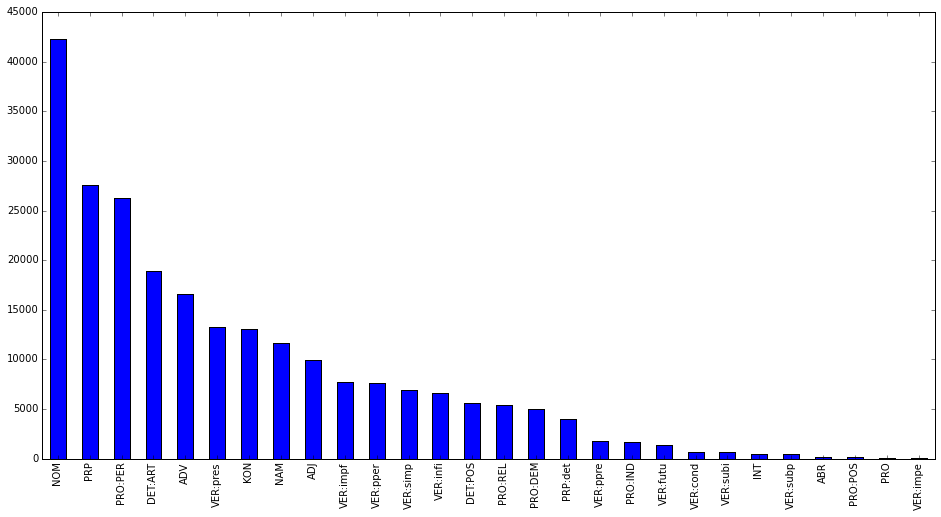

In [22]:
troismousquetaires.POS.value_counts().plot(kind="bar", figsize=(16,8))